#Семинар 5. Морфологический и синтаксический анализ

Сегодня на семинаре мы поговорим о том:
*   зачем нужны морфологический и синтаксический анализ в рекламе и PR
*   примеры применения: поиск брендов в отзывах, анализ тональности комментариев, выделение ключевых слов

##Морфологический анализ с Pymorphy2

Морфологический анализ: нормальные формы слов, грамматические признаки.

Синтаксический анализ: зависимые и главные слова в предложении.

NER (Named Entity Recognition): нахождение имён, брендов, организаций.

В рекламе и PR это помогает:

* анализировать комментарии и отзывы,

* находить упоминания брендов,

* делать автоматический мониторинг СМИ.

In [6]:
!pip install pymorphy3 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 32.1 MB/s eta 0:00:00


In [7]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

word = "брендов"
parsed = morph.parse(word)

for p in parsed:
    print(p, p.normal_form, p.tag)

Parse(word='брендов', tag=OpencorporaTag('NOUN,inan,masc plur,gent'), normal_form='бренд', score=1.0, methods_stack=((DictionaryAnalyzer(), 'брендов', 34, 7),)) бренд NOUN,inan,masc plur,gent


Теперь мы возьмем список слов и:

1. приведем их в нормальную форму;

2. определим часть речи;

3. посчитаем, сколько в списке существительных, прилагательных, глаголов.

In [10]:
words = ["брендов", "компания", "новый", "запускает", "рекламные", "кампании"]

nouns, verbs, adjs = 0, 0, 0

for w in words:
    p = morph.parse(w)[0]
    print(w, "→", p.normal_form, p.tag.POS)
    if p.tag.POS == "NOUN":
        nouns += 1
    elif p.tag.POS == "VERB":
        verbs += 1
    elif p.tag.POS == "ADJF":
        adjs += 1

print('--------------------------')
print("Существительных:", nouns)
print("Глаголов:", verbs)
print("Прилагательных:", adjs)

брендов → бренд NOUN
компания → компания NOUN
новый → новый ADJF
запускает → запускать VERB
рекламные → рекламный ADJF
кампании → кампания NOUN
--------------------------
Существительных: 3
Глаголов: 1
Прилагательных: 2


##Синтаксический анализ сo spaCy

Синтаксические зависимости

In [12]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
import spacy
from spacy import displacy

nlp = spacy.load("ru_core_news_sm")
doc = nlp("Компания Apple выпустила новый айфон.")

for token in doc:
    print(token.text, token.dep_, token.head.text, token.pos_)

Компания nsubj выпустила NOUN
Apple appos Компания PROPN
выпустила ROOT выпустила VERB
новый amod айфон ADJ
айфон obj выпустила NOUN
. punct выпустила PUNCT


In [14]:
displacy.render(doc, style="dep", jupyter=True)

Задание 1.

Разберите предложение: "Вчера бренд Nike представил новую коллекцию кроссовок."

Выведите, какое слово является корнем предложения.

Какие слова зависят от существительного «коллекцию»?

##Извлечение именованных сущностей с Natasha

In [16]:
!pip install natasha -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00


In [17]:
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsNERTagger, Doc

segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)
morph_vocab = MorphVocab()

text = "Samsung и Apple конкурируют за внимание покупателей в России."
doc = Doc(text)
doc.segment(segmenter)
doc.tag_ner(ner_tagger)

for span in doc.spans:
    span.normalize(morph_vocab)
    print(span.text, span.type)

Samsung ORG
Apple ORG
России LOC


Задание 2.

Напишите текст с упоминаниями хотя бы двух брендов и одного города.

С помощью Natasha извлеките все сущности.

Подумайте: зачем рекламщику уметь находить такие объекты?

##Теггинг с NLTK (на английском)

POS-теги

In [21]:
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")

nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

text = "Nike is very popular among young people."
tokens = nltk.word_tokenize(text)
print(nltk.pos_tag(tokens))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Nike', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('popular', 'JJ'), ('among', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('.', '.')]


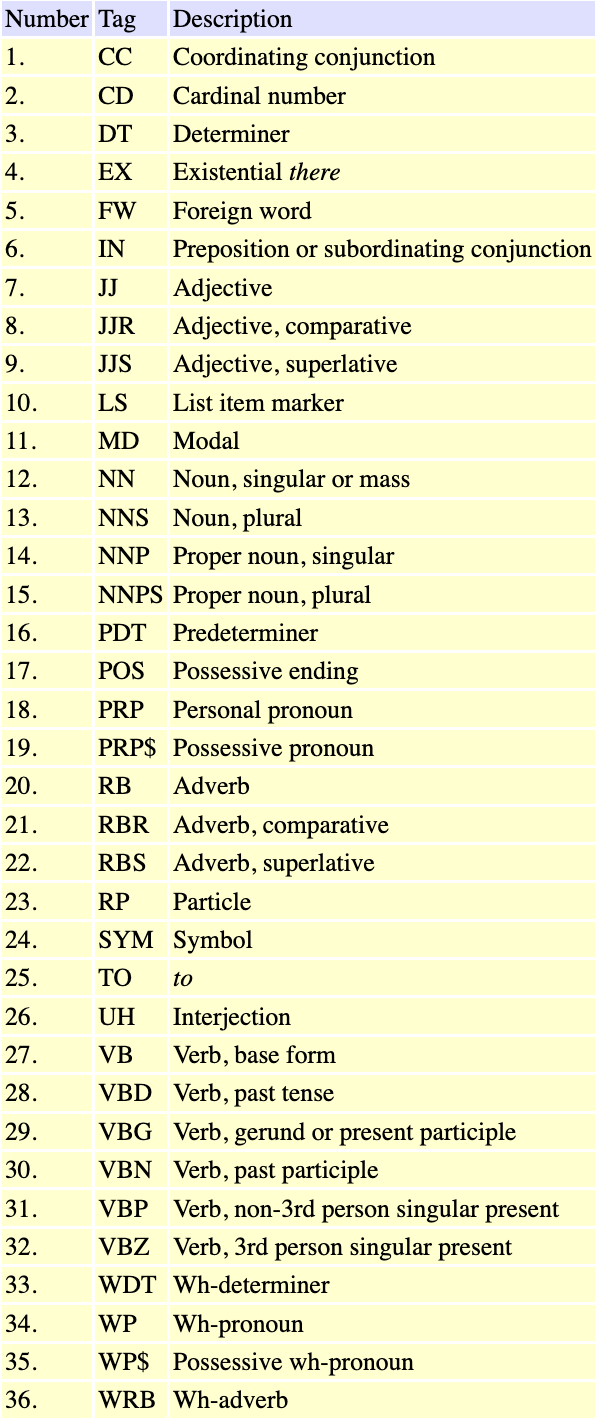

Задание 3.

Возьмите английское предложение о бренде.

Разбейте его на токены.

Определите части речи и сравните с тем, что делает Pymorphy2 для русского.

##Практика «Анализ комментариев»

Мы попробуем:

* выделить ключевые слова (лемматизация),

* посчитать частотность слов,

* извлечь бренды.

In [19]:
comments = [
    "Я купил новый телефон Samsung, очень доволен!",
    "Apple снова выпускает дорогие айфоны.",
    "Nike делает лучшие кроссовки."
]

all_words = []
for comment in comments:
    doc = nlp(comment)
    for token in doc:
        if not token.is_punct and not token.is_stop:
            all_words.append(token.lemma_)

print("Лемматизированные слова:", all_words)

from collections import Counter
print("Топ слов:", Counter(all_words).most_common(5))

Лемматизированные слова: ['купить', 'новый', 'телефон', 'samsung', 'довольный', 'apple', 'выпускать', 'дорогой', 'айфон', 'nike', 'делать', 'хороший', 'кроссовки']
Топ слов: [('купить', 1), ('новый', 1), ('телефон', 1), ('samsung', 1), ('довольный', 1)]


Задание 4.

Возьмите список комментариев (придумайте сами 5–6).

С помощью spaCy найдите ключевые слова (без стоп-слов).

С помощью Natasha извлеките бренды.

Попробуйте вручную оценить тональность каждого комментария (позитив/негатив).

##Мониторинг отзывов о брендах

Задача:

Есть поток комментариев из соцсетей.

Нужно:

1. найти упоминания брендов (Natasha),

2. посчитать, сколько позитивных/негативных отзывов встречается (простая тональность).

In [22]:
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsNERTagger, Doc
import spacy

# подготовка инструментов
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

nlp = spacy.load("ru_core_news_sm")

# список комментариев
comments = [
    "Очень доволен покупкой телефона Samsung, работает отлично!",
    "Новый айфон от Apple снова слишком дорогой.",
    "Nike делает удобные кроссовки, беру только у них.",
    "Samsung подвёл — батарея разряжается слишком быстро.",
    "Apple выпускает красивые, но ненадёжные ноутбуки."
]

# словарь для примитивной тональности
positive_words = {"отлично", "доволен", "удобные", "лучший", "красивые"}
negative_words = {"дорогой", "подвёл", "быстро", "ненадёжные"}

results = []

for comment in comments:
    # Извлечение сущностей (бренды и организации)
    doc = Doc(comment)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)
    brands = [span.text for span in doc.spans if span.type in ["ORG"]]

    # Простейший подсчёт тональности
    spacy_doc = nlp(comment)
    lemmas = [token.lemma_ for token in spacy_doc if not token.is_stop and not token.is_punct]

    score = 0
    for lemma in lemmas:
        if lemma in positive_words:
            score += 1
        if lemma in negative_words:
            score -= 1

    sentiment = "позитив" if score > 0 else "негатив" if score < 0 else "нейтрально"

    results.append((comment, brands, sentiment))

for comment, brands, sentiment in results:
    print(f"Комментарий: {comment}")
    print(f" Бренды: {brands}")
    print(f" Тональность: {sentiment}\n")

Комментарий: Очень доволен покупкой телефона Samsung, работает отлично!
 Бренды: ['Samsung']
 Тональность: позитив

Комментарий: Новый айфон от Apple снова слишком дорогой.
 Бренды: ['Apple']
 Тональность: негатив

Комментарий: Nike делает удобные кроссовки, беру только у них.
 Бренды: ['Nike']
 Тональность: нейтрально

Комментарий: Samsung подвёл — батарея разряжается слишком быстро.
 Бренды: ['Samsung']
 Тональность: негатив

Комментарий: Apple выпускает красивые, но ненадёжные ноутбуки.
 Бренды: ['Apple']
 Тональность: нейтрально

